In [1]:
import sys
import os, os.path

sys.path.append(os.path.join(os.getcwd() ,'/modules'))
root_path = "C:/git/Springboard-Public/Capstone Project 2/"
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/My Drive/Capstone Project 2/"

print('Current Working Dir: ', os.getcwd())
print('Root Path: ', root_path)

# We need to set the working directory since we are using relative paths from various locations
if os.getcwd() != root_path:
  os.chdir(root_path)

Current Working Dir:  C:\git\Springboard-Public\Capstone Project 2\notebooks
Root Path:  C:/git/Springboard-Public/Capstone Project 2/


In [2]:
from modules.lib.StandardTraining import *
from modules.models.DenseNet import DenseNet

from torchsummary import summary

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

%matplotlib inline

In [3]:
force_cpu = True
device = torch.device('cuda' if ~force_cpu and torch.cuda.is_available() else 'cpu')
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(f'Working on device={device}')

Working on device=cuda


In [4]:
net = DenseNet()

net = nn.DataParallel(net)
net.to(device)


summary(net, (1, 224, 224))   

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           3,136
              ReLU-2         [-1, 64, 224, 224]               0
       BatchNorm2d-3         [-1, 64, 224, 224]             128
            Conv2d-4         [-1, 32, 224, 224]          18,464
              ReLU-5         [-1, 32, 224, 224]               0
            Conv2d-6         [-1, 32, 224, 224]           9,248
              ReLU-7         [-1, 32, 224, 224]               0
              ReLU-8         [-1, 64, 224, 224]               0
            Conv2d-9         [-1, 32, 224, 224]          18,464
             ReLU-10         [-1, 32, 224, 224]               0
             ReLU-11         [-1, 96, 224, 224]               0
           Conv2d-12         [-1, 32, 224, 224]          27,680
             ReLU-13         [-1, 32, 224, 224]               0
             ReLU-14        [-1, 128, 2

In [5]:
standardTraining = StandardTraining(number_images=2500, 
                                     batch_size=10, 
                                     learning_rate=1e-4, 
                                     num_epochs=6,
                                     device=device, 
                                     net=net,
                                     image_width = 224,
                                     image_height = 224,
                                     use_positivity_weights=True,
                                     observation_min_count = 60,
                                     l2_reg=1e-4)

C:\git\Springboard-Public\Capstone Project 2\modules\lib\ChextXRayImages.py:251: UserWarning: 
Feature Imbalance Detected (train % - val %):
   Atelectasis: 2.01%

  self.warnFeatureImbalance(train, value)


Total Oversampled Rows Added to Train: 819

Number of Training Images: 2,803
Number of Validation Images: 516

Positive Weights used in BCEWithLogitsLoss:


Enlarged_Cardiomediastinum     17.201299
Cardiomegaly                    3.807890
Lung_Opacity                    1.138063
Lung_Lesion                    17.320261
Edema                           2.575255
Consolidation                  27.602041
Pneumonia                      47.327586
Atelectasis                     5.228889
Pneumothorax                   16.518750
Pleural_Effusion                1.583410
Pleural_Other                 115.791667
Fracture                       39.042857
dtype: float64

In [6]:
standardTraining.train()

▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [1/6]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 704.4523         
Time of Completion: 2020-07-29 08:42:54.246399          
Training Duration: 0:01:07.852766          
Validation Duration: 0:00:04.616630

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,583,0.722127,0.432238,0.540784,0.805826,0.667875
4,Edema,784,0.700255,0.459799,0.555106,0.763548,0.592381
5,Consolidation,98,0.459184,0.033210,0.061941,0.512151,0.036038
7,Atelectasis,450,0.595556,0.230439,0.332300,0.667067,0.390999
9,Pleural_Effusion,1085,0.690323,0.587451,0.634746,0.766205,0.700876



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,73,0.082192,0.300000,0.129032,0.600668,0.213194
4,Edema,120,0.883333,0.292011,0.438923,0.662479,0.356732
5,Consolidation,28,0.964286,0.054545,0.103250,0.468677,0.054850
7,Atelectasis,76,0.776316,0.166197,0.273782,0.533792,0.154574
9,Pleural_Effusion,177,0.242938,0.530864,0.333333,0.615636,0.463014


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [2/6]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 455.0607         
Time of Completion: 2020-07-29 08:44:06.989658          
Training Duration: 0:01:08.015927          
Validation Duration: 0:00:04.661507

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,583,0.749571,0.511710,0.608212,0.861046,0.761630
4,Edema,784,0.729592,0.514851,0.603694,0.808843,0.672954
5,Consolidation,98,0.602041,0.049126,0.090839,0.614142,0.055407
7,Atelectasis,450,0.633333,0.266106,0.374753,0.730195,0.433260
9,Pleural_Effusion,1085,0.703226,0.625923,0.662326,0.808460,0.753899



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,73,0.561644,0.180617,0.273333,0.616748,0.249498
4,Edema,120,0.633333,0.367150,0.464832,0.700737,0.348365
5,Consolidation,28,0.678571,0.061889,0.113433,0.555694,0.068430
7,Atelectasis,76,0.697368,0.158683,0.258537,0.538606,0.160893
9,Pleural_Effusion,177,0.728814,0.467391,0.569536,0.678516,0.515965


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [3/6]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 369.1470         
Time of Completion: 2020-07-29 08:45:19.583893          
Training Duration: 0:01:07.919740          
Validation Duration: 0:00:04.611663

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,583,0.773585,0.548662,0.641993,0.887308,0.793821
4,Edema,784,0.756378,0.551628,0.637977,0.845618,0.725122
5,Consolidation,98,0.622449,0.062181,0.113068,0.720657,0.107180
7,Atelectasis,450,0.715556,0.322322,0.444444,0.796867,0.545071
9,Pleural_Effusion,1085,0.728111,0.657238,0.690861,0.840976,0.797059



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,73,0.602740,0.146667,0.235925,0.535174,0.158315
4,Edema,120,0.550000,0.315789,0.401216,0.667403,0.345959
5,Consolidation,28,0.607143,0.059649,0.108626,0.515662,0.064274
7,Atelectasis,76,0.631579,0.180451,0.280702,0.535048,0.157213
9,Pleural_Effusion,177,0.683616,0.456604,0.547511,0.674550,0.540828


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [4/6]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 270.5989         
Time of Completion: 2020-07-29 08:46:32.330098          
Training Duration: 0:01:08.083699          
Validation Duration: 0:00:04.601668

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,583,0.806175,0.542725,0.648723,0.901185,0.816665
4,Edema,784,0.756378,0.554206,0.639698,0.857402,0.741461
5,Consolidation,98,0.775510,0.094527,0.168514,0.823260,0.159490
7,Atelectasis,450,0.731111,0.335714,0.460140,0.816488,0.556660
9,Pleural_Effusion,1085,0.753917,0.669943,0.709454,0.852956,0.815814



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,73,0.068493,0.217391,0.104167,0.588670,0.187317
4,Edema,120,0.891667,0.293956,0.442149,0.686700,0.348900
5,Consolidation,28,0.250000,0.033654,0.059322,0.413788,0.044049
7,Atelectasis,76,0.381579,0.144279,0.209386,0.506579,0.152085
9,Pleural_Effusion,177,0.581921,0.530928,0.555256,0.694515,0.537336


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [5/6]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 203.7839         
Time of Completion: 2020-07-29 08:47:45.635229          
Training Duration: 0:01:08.501934          
Validation Duration: 0:00:04.742336

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,583,0.811321,0.631509,0.710210,0.932970,0.854422
4,Edema,784,0.789541,0.594050,0.677985,0.888322,0.787294
5,Consolidation,98,0.795918,0.122449,0.212245,0.876981,0.327117
7,Atelectasis,450,0.748889,0.368709,0.494135,0.845010,0.595518
9,Pleural_Effusion,1085,0.775115,0.696192,0.733537,0.877817,0.840643



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,73,0.356164,0.175676,0.235294,0.603420,0.202430
4,Edema,120,0.475000,0.367742,0.414545,0.699242,0.364366
5,Consolidation,28,0.214286,0.050000,0.081081,0.503293,0.053915
7,Atelectasis,76,0.631579,0.166090,0.263014,0.545514,0.180832
9,Pleural_Effusion,177,0.802260,0.438272,0.566866,0.705881,0.543823


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [6/6]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 166.6790         
Time of Completion: 2020-07-29 08:48:57.090136          
Training Duration: 0:01:06.868190          
Validation Duration: 0:00:04.525870

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,583,0.867925,0.648718,0.742480,0.948955,0.886640
4,Edema,784,0.839286,0.669379,0.744765,0.915591,0.831292
5,Consolidation,98,0.826531,0.158203,0.265574,0.928960,0.443403
7,Atelectasis,450,0.797778,0.431490,0.560062,0.882944,0.680710
9,Pleural_Effusion,1085,0.816590,0.747049,0.780273,0.908405,0.875167



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,73,0.136986,0.156250,0.145985,0.605121,0.186191
4,Edema,120,0.841667,0.333333,0.477541,0.705093,0.367539
5,Consolidation,28,0.214286,0.049180,0.080000,0.479728,0.054048
7,Atelectasis,76,0.565789,0.161654,0.251462,0.548684,0.171568
9,Pleural_Effusion,177,0.689266,0.438849,0.536264,0.672600,0.499497


Training Duration: 0:07:15.373971



TRAINING

▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.300392
Hamming Loss,0.157837
Combined Recall,0.673386
Combined Precision,0.501683
Combined F1,0.547369


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,154,0.870130,0.276289,0.419405,0.937384,0.720180
1,Cardiomegaly,583,0.867925,0.648718,0.742480,0.948955,0.886640
2,Lung_Opacity,1311,0.771930,0.762622,0.767248,0.867327,0.860838
3,Lung_Lesion,153,0.849673,0.260000,0.398162,0.935445,0.694668
4,Edema,784,0.839286,0.669379,0.744765,0.915591,0.831292
5,Consolidation,98,0.826531,0.158203,0.265574,0.928960,0.443403
6,Pneumonia,58,0.844828,0.104701,0.186312,0.934238,0.476991
7,Atelectasis,450,0.797778,0.431490,0.560062,0.882944,0.680710
8,Pneumothorax,160,0.793750,0.195385,0.313580,0.895107,0.402755
9,Pleural_Effusion,1085,0.816590,0.747049,0.780273,0.908405,0.875167


***** ROC *****


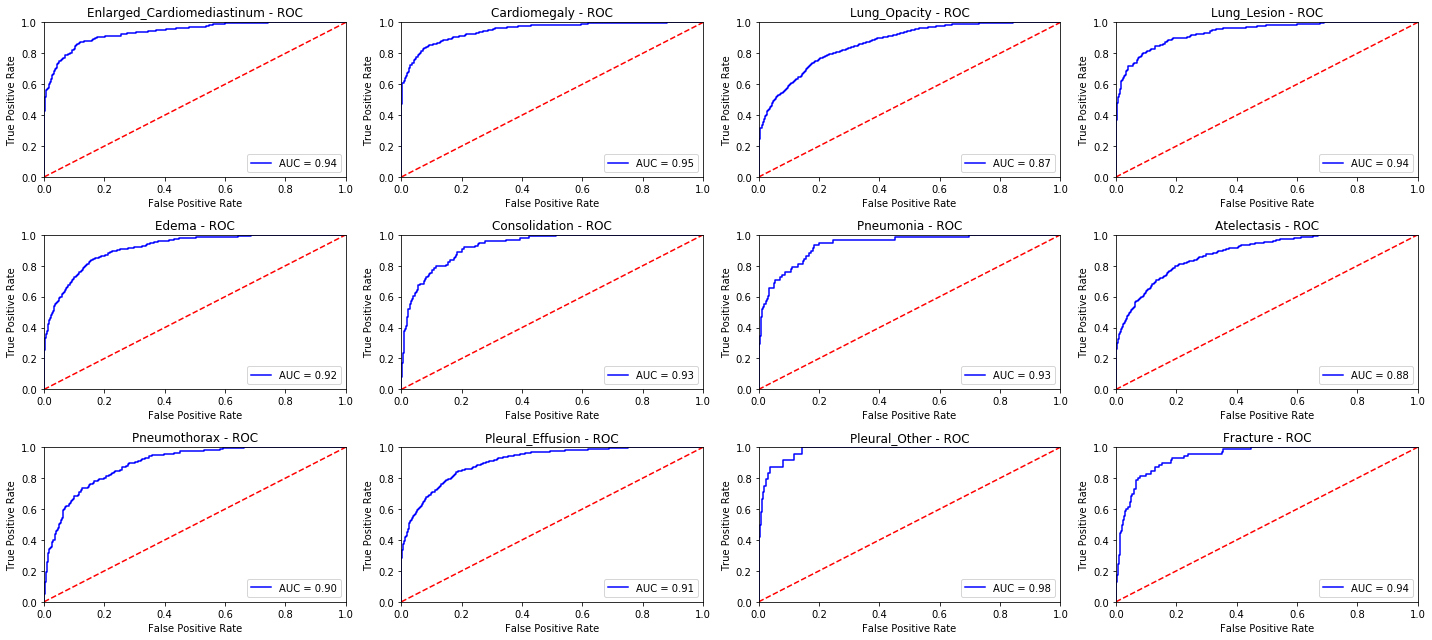

***** Precision / Recall *****


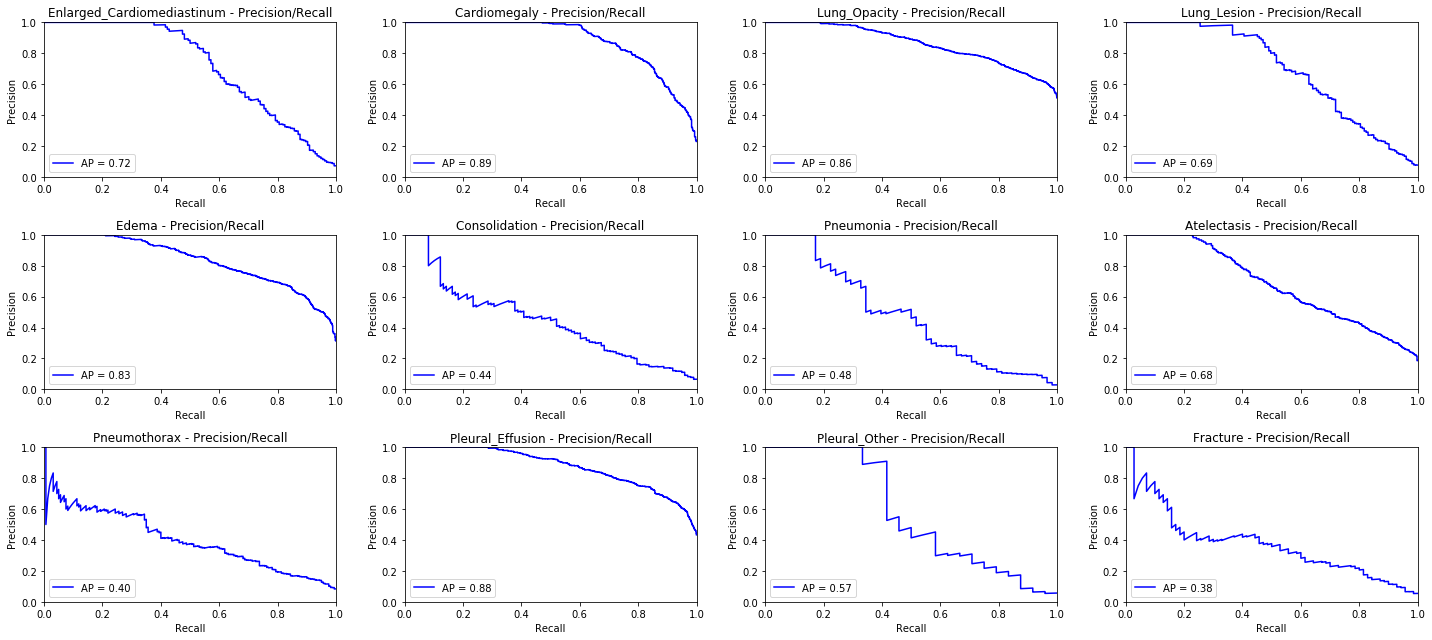


VALIDATION

▔▔▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.015504
Hamming Loss,0.293282
Combined Recall,0.433172
Combined Precision,0.226880
Combined F1,0.276430


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,33,0.090909,0.054545,0.068182,0.492879,0.086734
1,Cardiomegaly,73,0.136986,0.156250,0.145985,0.605121,0.186191
2,Lung_Opacity,234,0.594017,0.545098,0.568507,0.620795,0.556720
3,Lung_Lesion,25,0.160000,0.045977,0.071429,0.530916,0.068466
4,Edema,120,0.841667,0.333333,0.477541,0.705093,0.367539
5,Consolidation,28,0.214286,0.049180,0.080000,0.479728,0.054048
6,Pneumonia,10,0.200000,0.019048,0.034783,0.633399,0.046955
7,Atelectasis,76,0.565789,0.161654,0.251462,0.548684,0.171568
8,Pneumothorax,44,0.454545,0.104712,0.170213,0.649509,0.140275
9,Pleural_Effusion,177,0.689266,0.438849,0.536264,0.672600,0.499497


***** ROC *****


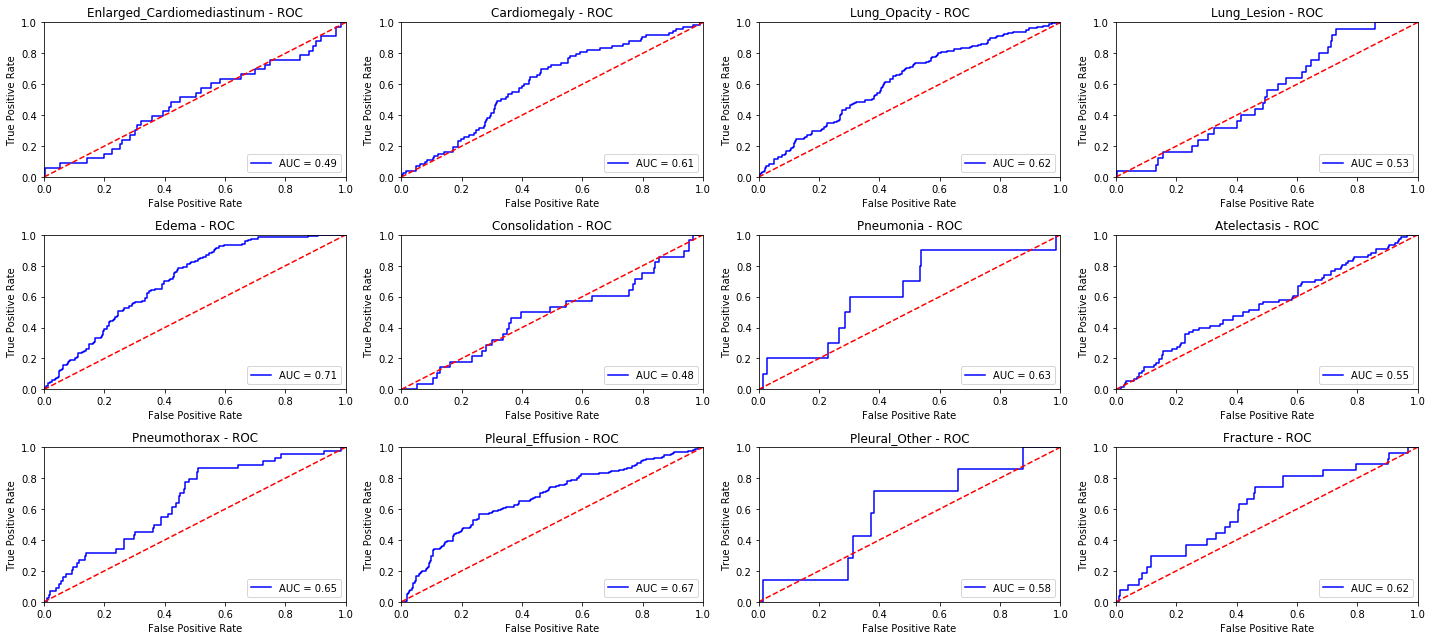

***** Precision / Recall *****


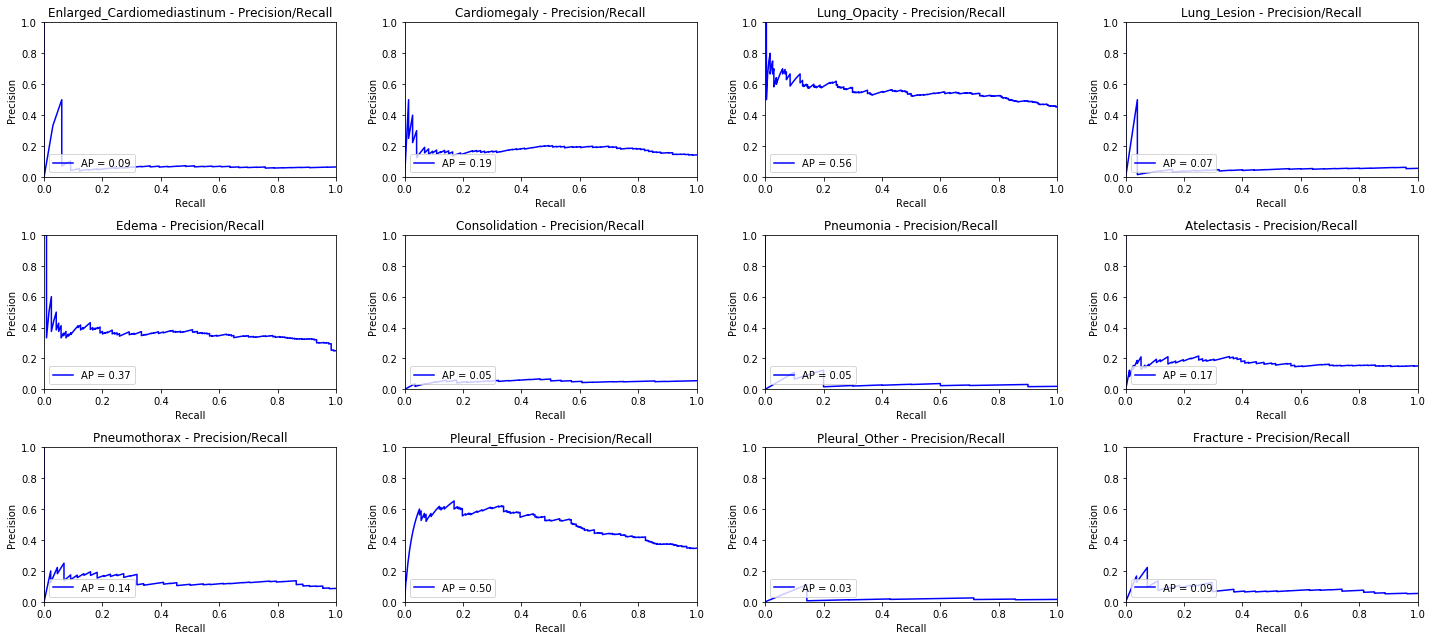

In [7]:
standardTraining.displayMetrics()


ACCURACY

▔▔▔▔


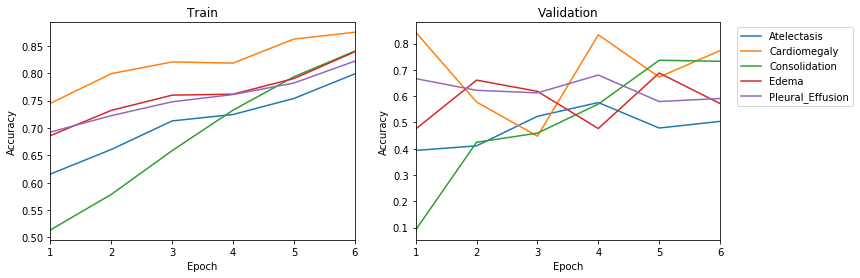


RECALL

▔▔▔


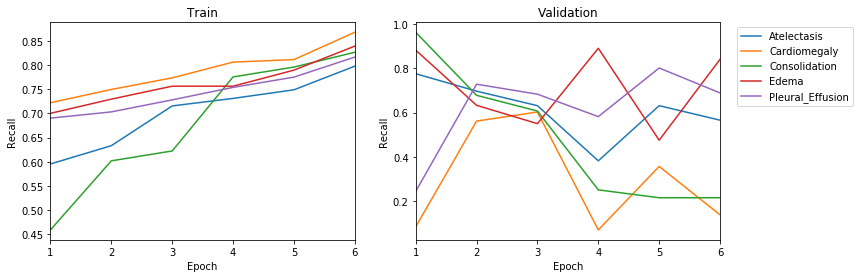


PRECISION

▔▔▔▔▔▔


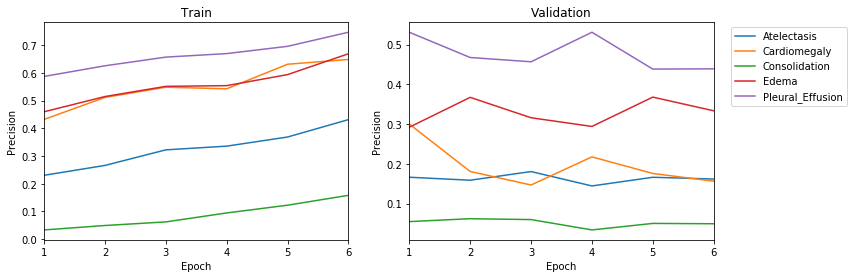


F1

▔


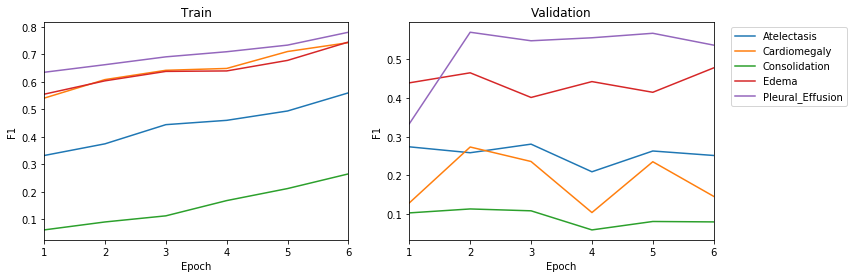


ROC AUC

▔▔▔▔


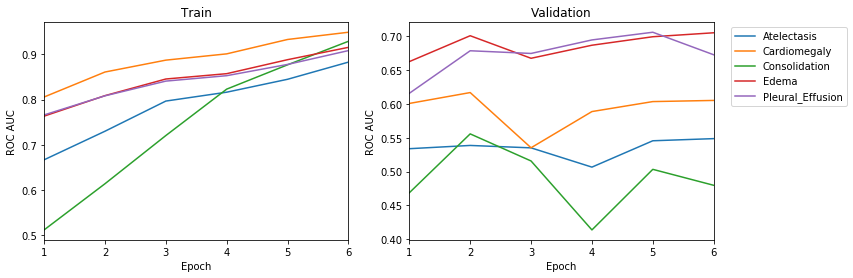


AVERAGE PRECISION

▔▔▔▔▔▔▔▔


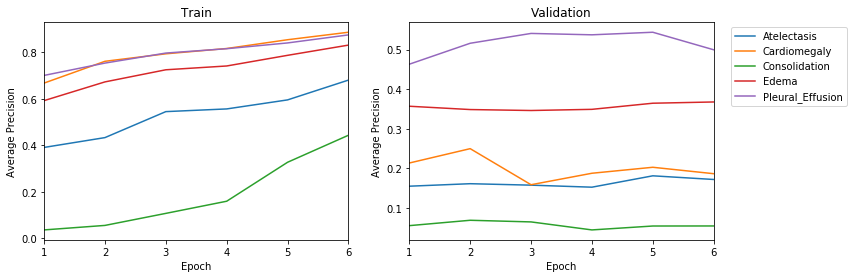

In [8]:
standardTraining.displayEpochProgression()